In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [425]:
df = pd.read_csv('./games.csv', low_memory=False)

In [426]:
df

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-03-21,22000645,Final,1610612748,1610612754,2020,1610612748,106.0,0.402,0.826,...,27.0,51.0,1610612754,109.0,0.388,0.900,0.333,27.0,50.0,0
1,2021-03-21,22000016,Final,1610612745,1610612760,2020,1610612745,112.0,0.494,0.741,...,22.0,38.0,1610612760,114.0,0.462,0.680,0.333,22.0,52.0,0
2,2021-03-21,22000646,Final,1610612743,1610612740,2020,1610612743,108.0,0.500,0.800,...,30.0,37.0,1610612740,113.0,0.482,0.767,0.286,26.0,45.0,0
3,2021-03-21,22000167,Final,1610612738,1610612753,2020,1610612738,112.0,0.455,1.000,...,27.0,45.0,1610612753,96.0,0.381,0.700,0.324,20.0,44.0,1
4,2021-03-21,22000647,Final,1610612751,1610612764,2020,1610612751,113.0,0.489,0.727,...,24.0,35.0,1610612764,106.0,0.532,0.789,0.333,24.0,43.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24190,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
24191,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
24192,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
24193,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [427]:
# choose year to analyze
df = df.loc[df['SEASON'] == 2014]

In [428]:
# We will use a python package like NetworkX to make a digraph with nodes
# representing teams and directed edges of losing teams pointing to winning teams for each
# recorded game. We can then count the in-degree of each team and use this as an additional
# feature for question 1

# point threshold for edges
difEdge = 0

import networkx as nx
G = nx.DiGraph()
G.add_nodes_from(df["HOME_TEAM_ID"])
for index, row in df.iterrows():
    if row['HOME_TEAM_WINS'] and (row['PTS_home']-row['PTS_away'] >= difEdge):
        G.add_edge(row['VISITOR_TEAM_ID'],row['HOME_TEAM_ID'], weight = row['PTS_home']-row['PTS_away'])
    elif not(row['HOME_TEAM_WINS']) and (row['PTS_away']-row['PTS_home'] >= difEdge): 
        G.add_edge(row['HOME_TEAM_ID'], row['VISITOR_TEAM_ID'], weight = row['PTS_away']-row['PTS_home'])
print("num nodes are: " + str(len(G.nodes())))
print("num edges are: " + str(len(G.edges())))

num nodes are: 30
num edges are: 705


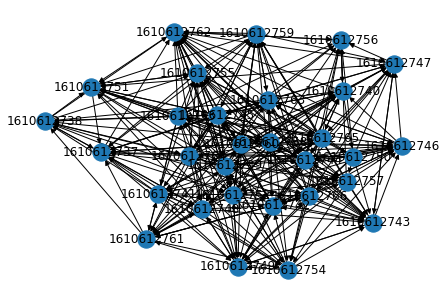

In [423]:
# plotting full graph
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True) # takes too long sometimes so be careful when running
plt.savefig('full_graph2020' + str(difEdge))
plt.show()

Strongest connected component has: 30 nodes and 295 edges


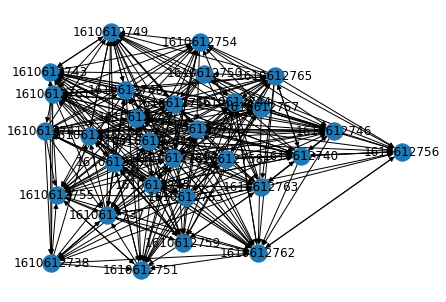

In [424]:
# strongly connected component
Gc = (G.subgraph(c) for c in nx.strongly_connected_components(G))
gc2 = max(Gc, key = len)
print("Strongest connected component has: " + str(len(gc2.nodes()))+ " nodes " + "and " + str(len(gc2.edges())) + " edges")
nx.draw(gc2,with_labels=True)
plt.savefig('full_graph_strong_2020' + str(difEdge))
plt.show()

In [355]:
# finding max page rank
pr = nx.pagerank(G)
mpage = max(pr, key=pr.get)
print("Node of the max page rank is: " + str(mpage) + " which has a value of " + str(pr[max(pr, key=pr.get)]))

Node of the max page rank is: 1610612744 which has a value of 0.037580597671451145


In [356]:
# doing HITS analysis
h,a = nx.hits(G,max_iter = 1000)
print("Node of the max hub is: " + str(max(h, key=h.get)) + " which has a value of " + str(h[max(h, key=h.get)]))
print("Node of the max authority is: " + str(max(a, key=a.get)) + " which has a value of " + str(a[max(a, key=a.get)]))

Node of the max hub is: 1610612766 which has a value of 0.0389674139413974
Node of the max authority is: 1610612744 which has a value of 0.03829162254105961


In [357]:
# calculate all in-degrees and compute max
indeg = G.in_degree(G.nodes())
maxindex = 0
maxindeg = 0
for i,ks in indeg:
    if ks > maxindeg:
        maxindeg = ks
        maxindex = i
print("Node of the max indegree is: " + str(maxindex) + " which has a value of " + str(maxindeg))

Node of the max indegree is: 1610612743 which has a value of 29


In [432]:
# add features col for each year
df = pd.read_csv('./games.csv', low_memory=False)
df['pagerank'] = np.nan
df['hub'] = np.nan
df['authority'] = np.nan
df['indegree'] = np.nan

In [433]:
# loop through years
asf = pd.DataFrame(columns=df.columns)
mylist = []
for i in range(2003, 2021):
    df2 = df.loc[df['SEASON'] == i]
    G = nx.DiGraph()
    G.add_nodes_from(df2["HOME_TEAM_ID"])
    for index, row in df2.iterrows():
        if row['HOME_TEAM_WINS']:
            G.add_edge(row['VISITOR_TEAM_ID'],row['HOME_TEAM_ID'])
        else: 
            G.add_edge(row['HOME_TEAM_ID'], row['VISITOR_TEAM_ID'])
    pr = nx.pagerank(G)
    h,a = nx.hits(G,max_iter = 1000)
    indeg = G.in_degree(G.nodes())
    for index, row in df2.iterrows():
        df2.loc[index, 'pagerank'] = pr[row['HOME_TEAM_ID']]
        df2.loc[index, 'hub'] = h[row['HOME_TEAM_ID']]
        df2.loc[index, 'authority'] = a[row['HOME_TEAM_ID']]
        df2.loc[index, 'indegree'] = indeg[row['HOME_TEAM_ID']]
    asf = asf.append(df2)
    
    maxindex = 0
    maxindeg = 0
    for j,ks in indeg:
        if ks > maxindeg:
            maxindeg = ks
            maxindex = j
    mylist.append([i, max(pr, key=pr.get), pr[max(pr, key=pr.get)], max(h, key=h.get), h[max(h, key=h.get)], max(a, key=a.get),a[max(a, key=a.get)],maxindex, maxindeg])


/Users/tommtommbom/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [434]:
# this dataframe is the max node and value for pagerank, HITS, and indegree for each year
yeardfmax = pd.DataFrame(mylist, columns = ['Year', 'Pagerank Node','Pagerank Val','Hub Node','Hub Val','Auth Node','Auth Val','Indeg Node','Indeg Val'])

,Year,Pagerank Node,Pagerank Val,Hub Node,Hub Val,Auth Node,Auth Val,Indeg Node,Indeg Val
0,2003,1610612747,0.040720,1610612749,0.040118,1610612759,0.040620,1610612747,28
1,2004,1610612742,0.041322,1610612737,0.040538,1610612756,0.040790,1610612759,29
2,2005,1610612742,0.039177,1610612753,0.039026,1610612742,0.039332,1610612742,29
3,2006,1610612743,0.040623,1610612738,0.038857,1610612742,0.040041,1610612756,29
4,2007,1610612762,0.042796,1610612748,0.040903,1610612738,0.040927,1610612738,29
5,2008,1610612747,0.041761,1610612758,0.041148,1610612747,0.040828,1610612747,29
6,2009,1610612753,0.041377,1610612751,0.040564,1610612742,0.040782,1610612753,29
7,2010,1610612748,0.040536,1610612739,0.040098,1610612741,0.040234,1610612748,29
8,2011,1610612743,0.044466,1610612766,0.045928,1610612763,0.044907,1610612763,27
9,2012,1610612748,0.041480,1610612739,0.041080,1610612748,0.041500,1610612748,29


In [435]:
# add NBA champs column from wikipedia
nbachamps = [1610612759, 1610612765, 1610612759,1610612748,1610612759,1610612738,1610612747,1610612747,1610612742, 1610612748, 1610612748,1610612759,1610612744,1610612739,1610612744,1610612744,1610612761,1610612747]
yeardfmax["NBA Champs"] = nbachamps
yeardfmax

,Year,Pagerank Node,Pagerank Val,Hub Node,Hub Val,Auth Node,Auth Val,Indeg Node,Indeg Val,NBA Champs
0,2003,1610612747,0.040720,1610612749,0.040118,1610612759,0.040620,1610612747,28,1610612759
1,2004,1610612742,0.041322,1610612737,0.040538,1610612756,0.040790,1610612759,29,1610612765
2,2005,1610612742,0.039177,1610612753,0.039026,1610612742,0.039332,1610612742,29,1610612759
3,2006,1610612743,0.040623,1610612738,0.038857,1610612742,0.040041,1610612756,29,1610612748
4,2007,1610612762,0.042796,1610612748,0.040903,1610612738,0.040927,1610612738,29,1610612759
5,2008,1610612747,0.041761,1610612758,0.041148,1610612747,0.040828,1610612747,29,1610612738
6,2009,1610612753,0.041377,1610612751,0.040564,1610612742,0.040782,1610612753,29,1610612747
7,2010,1610612748,0.040536,1610612739,0.040098,1610612741,0.040234,1610612748,29,1610612747
8,2011,1610612743,0.044466,1610612766,0.045928,1610612763,0.044907,1610612763,27,1610612742
9,2012,1610612748,0.041480,1610612739,0.041080,1610612748,0.041500,1610612748,29,1610612748


In [446]:
# calculating the percentage correct for each metric in computing the NBA Champs for each year
prright = (yeardfmax['Pagerank Node'] == yeardfmax['NBA Champs']).mean()
hubright = (yeardfmax['Hub Node'] == yeardfmax['NBA Champs']).mean()
authright = (yeardfmax['Auth Node'] == yeardfmax['NBA Champs']).mean()
indegright = (yeardfmax['Indeg Node'] == yeardfmax['NBA Champs']).mean()
percentRight = [prright, hubright, authright, indegright]
percentRight

[0.1111111111111111, 0.0, 0.3333333333333333, 0.2777777777777778]

In [203]:
# converting to csv for input into classification code
asf.to_csv('game2.csv')